In [9]:
import deorbit
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import deorbit.data_models
from deorbit.utils.dataio import load_sim_data, load_sim_config
from deorbit.data_models.sim import SimConfig
from deorbit.utils.constants import GM_EARTH
import numpy as np

In [6]:
# Runs in about 70s
sim = deorbit.simulator.run(
    "adams_bashforth",
    "coesa_atmos_fast",
    initial_state=np.array((deorbit.constants.EARTH_RADIUS + 150000, 0, 0, 7820)),
    time_step=0.1,
)

print(type(sim))

Running simulation with Two-step Adams-Bashforth integrator
Ran 262728 iterations at time step of 0.1 seconds
Impacted at [ 6168983.59022716 -1591617.34648274] at velocity [-48.10422636  12.41104308] at simulated time 26272.89999989817s.
Simulation finished in 5.78125 seconds
<class 'deorbit.simulator.simulator.AdamsBashforthSimulator'>


In [7]:
# Load saved simulation data and configuration
save_path = sim.save_data("eg/", format="pkl")
sim_data = load_sim_data(save_path)
sim_config: SimConfig = load_sim_config(save_path)

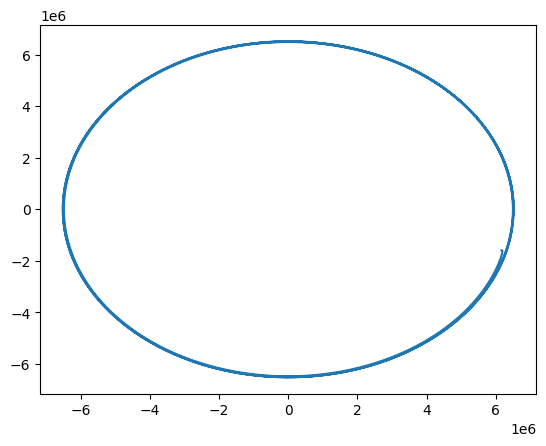

In [14]:
x = sim_data.x1
y = sim_data.x2
fig, ax = plt.subplots()

ax.plot(x, y)

In [16]:
%matplotlib widget
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

def init():
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(min(y), max(y))
    return line,

def update(frame):
    line.set_data(x[:frame], y[:frame])
    return line,

# Number of frames should be equal to the number of points in the trajectory
num_frames = len(x)

ani = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)
plt.show()

<IPython.core.display.Javascript object>

c:\Users\court\Documents\anaconda\envs\mir-project\lib\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
